In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import datetime
import pandas as pd

import lmfit 

In [2]:
from subnautica_carthography import positioning as sp

from importlib import reload

# Instantiating the coordinate logger

In [2]:
from subnautica_carthography import coordinate_logging as cl


In [3]:
clog = cl.CoordinateLogger(beacon_log_fn='subnautica_beacons_2', depth_log_fn='subnautica_depths_2')

In [4]:
clog.beacon_log

beacon            x           y  z  \
0                    LP5     0.000000    0.000000  0   
1                   E3.5   350.000000    0.000000 -1   
2                     S7     0.000000 -700.000000 -1   
3                    W10 -1000.000000    0.000000 -1   
4      Aurora Stern Port   448.291104 -314.972491  0   
5  Aurora Stern Starbord   814.050918 -709.045615 -1   

                        added  
0  2021-08-06 21:59:46.552012  
1  2021-08-06 21:59:46.576569  
2  2021-08-06 22:06:00.720109  
3  2021-08-06 22:19:42.689892  
4  2021-08-06 23:06:08.840861  
5  2021-08-06 23:13:20.078491

In [5]:
clog.beacon_log
clog.depth_log


x           y    z                       added
0    16.214792 -700.738100 -125  2021-08-06 22:07:53.767776
1  -411.774062 -215.982100 -110  2021-08-06 22:23:23.014112
2  -389.620012 -269.670013 -115  2021-08-06 22:26:42.613667
3  -310.050223 -333.015812  -85  2021-08-06 22:31:20.197618
4  -200.268956 -334.997115  -34  2021-08-06 22:34:46.078893
5   -74.307344 -366.882783  -19  2021-08-06 22:36:16.416136
6   -52.595305 -349.931668  -23  2021-08-06 22:38:31.318503
7    -0.220747    8.804486  -20  2021-08-06 22:44:29.165043
8    19.050800  117.580551  -21  2021-08-06 22:45:47.651769
9  -218.144220  -48.658616  -42  2021-08-06 22:47:57.460421
10 -189.610069  -24.295610  -17  2021-08-06 22:50:28.639090
11  139.672240  -28.732539  -57  2021-08-06 22:57:09.817854
12  259.673552   92.252560  -97  2021-08-06 22:58:33.320852
13  443.193501 -312.758176  -25  2021-08-06 23:07:32.870244
14  350.750133 -332.694449  -36  2021-08-06 23:08:54.425103
15  489.684872 -414.558472  -86  2021-08-06 23:10:12.567029
16  812.271287 -723.900748 -195  2021-08-06 23:15:03.036819
17  265.830863 -445.342378  -96  2021-08-06 23:17:41.297645
18  229.577558 -409.313048  -61  2021-08-06 23:18:55.869542
19  161.463150 -488.767223  -95  2021-08-06 23:20:38.523868
20   93.304455 -572.558434 -104  2021-08-06 23:22:52.648930
21  -53.736373 -570.840494 -105  2021-08-06 23:27:03.859007
22 -106.430039 -509.034573  -52  2021-08-06 23:28:20.892359
23  -68.895884 -440.587328  -27  2021-08-06 23:51:49.681320

In [22]:
# clog.write_coords_to_beacon_log("LP5", 0, 0, 0)
# clog.write_coords_to_beacon_log("N5", 0, 500, -1)
# clog.write_coords_to_beacon_log("E3.5", 350, 0, -1)
# clog.write_coords_to_beacon_log("S7", 0, -700, -1)
clog.write_coords_to_beacon_log("W10", -1000, 0, -1)

# clog.write_coords_to_beacon_log("SE teleporter", 95.76222287289724, -1321.9642222528837, -292)


# {'x': 95.76222287289724, 'y': -1321.9642222528837, 'z': -292}

## The beacon log after adding the standard position beacons 

In [23]:
clog.beacon_log

beacon     x    y  z                       added
0    LP5     0    0  0  2021-08-06 21:59:46.552012
1   E3.5   350    0 -1  2021-08-06 21:59:46.576569
2     S7     0 -700 -1  2021-08-06 22:06:00.720109
3    W10 -1000    0 -1  2021-08-06 22:19:42.689892

### removing beacons added by accident: 

In [9]:
clog.beacon_log

beacon      x      y  z                       added
0    LP5    0.0    0.0  0  2021-07-31 16:35:48.315779
1     S5    0.0 -500.0 -1  2021-07-31 17:00:47.037228
2     N5    0.0  500.0 -1  2021-07-31 17:05:08.522962
3     W5 -500.0    0.0  0  2021-07-31 17:09:54.989415
4     E5  500.0    0.0 -1  2021-07-31 17:30:12.450815

In [24]:
clog.depth_log

x         y    z                       added
0  16.214792 -700.7381 -125  2021-08-06 22:07:53.767776

In [11]:
# clog._write_depth_log(clog.depth_log.drop([0,1]))

In [12]:
clog.depth_log

Empty DataFrame
Columns: [x, y, z, added]
Index: []

## Logging beacons and depths

### A beacon can be added using "log-beacon"

In [6]:
clog.verbose =False

# Log beacon

In [96]:
clog.log_beacon(
    name="Aurora Front Port",
    depth=16,
    observations = [
                    ("LP5", 1157),
                    ("S7", 1493),
                    ("W10", 2138),
                    # ("Aurora Stern Port", 533),
                    ("Aurora Stern Starbord", 1040),
        
        
                   ], 
)


beacon            x           y   z  \
0                    LP5     0.000000    0.000000   0   
1                   E3.5   350.000000    0.000000  -1   
2                     S7     0.000000 -700.000000  -1   
3                    W10 -1000.000000    0.000000  -1   
4      Aurora Stern Port   448.291104 -314.972491   0   
5  Aurora Stern Starbord   814.050918 -709.045615  -1   
6      Aurora Front Port  1120.193866  285.481990 -16   

                        added  
0  2021-08-06 21:59:46.552012  
1  2021-08-06 21:59:46.576569  
2  2021-08-06 22:06:00.720109  
3  2021-08-06 22:19:42.689892  
4  2021-08-06 23:06:08.840861  
5  2021-08-06 23:13:20.078491  
6  2021-08-07 11:44:56.025624

In [58]:
clog.beacon_log

beacon            x           y  z  \
0                    LP5     0.000000    0.000000  0   
1                   E3.5   350.000000    0.000000 -1   
2                     S7     0.000000 -700.000000 -1   
3                    W10 -1000.000000    0.000000 -1   
4      Aurora Stern Port   448.291104 -314.972491  0   
5  Aurora Stern Starbord   814.050918 -709.045615 -1   

                        added  
0  2021-08-06 21:59:46.552012  
1  2021-08-06 21:59:46.576569  
2  2021-08-06 22:06:00.720109  
3  2021-08-06 22:19:42.689892  
4  2021-08-06 23:06:08.840861  
5  2021-08-06 23:13:20.078491

# Log Depth

In [17]:
clog.verbose = False

In [102]:
depth_log = clog.log_depth(
    depth=41,
    observations = [
                    ("LP5", 312),
                    ("S7", 491),
                    ("W10", 1212),
                    # ("Aurora Stern Port", 533),
                    # ("Aurora Stern Starbord", 1040),
        
        
                   ], 
    )

In [103]:
# depth_log

In [104]:
depth_log.iloc[-1]

x                        185.819543
y                       -247.272509
z                               -41
added    2021-08-07 11:51:07.631882
Name: 46, dtype: object

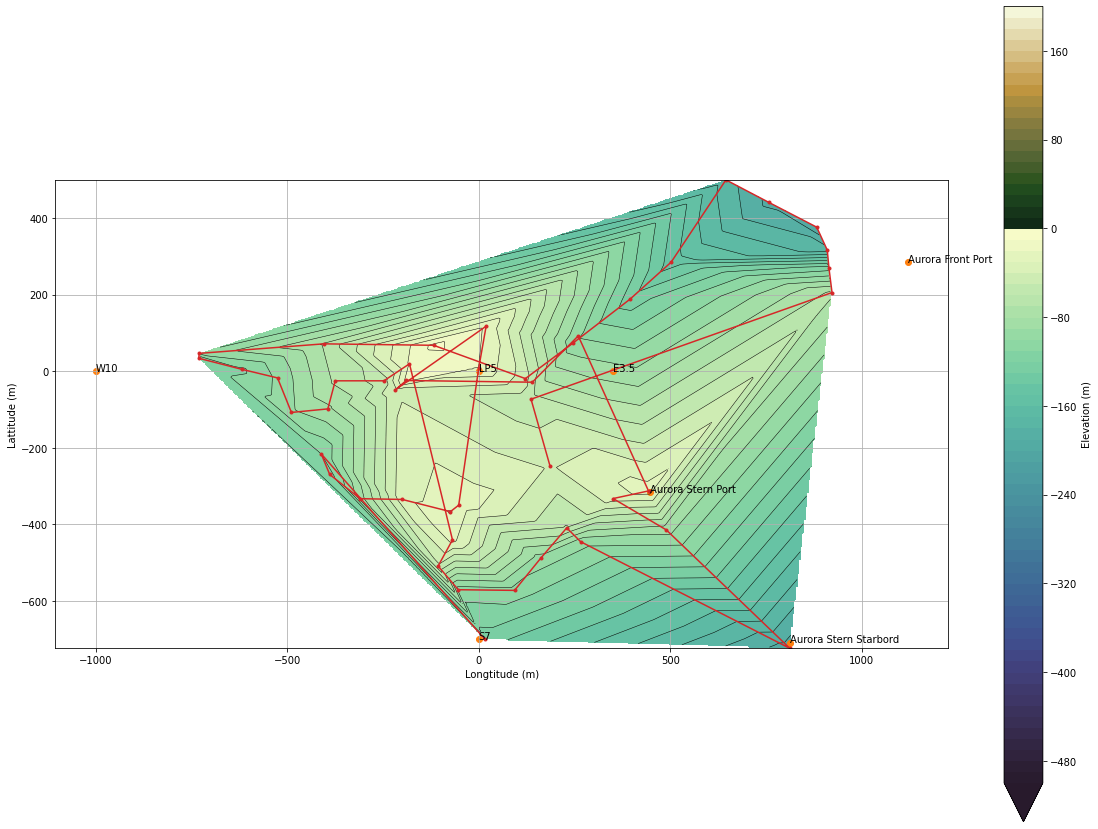

In [105]:
f, ax = clog.make_nautical_chart()
ax.plot(depth_log['x'], depth_log['y'], marker='.', c='C3')